# K-Means

1. It begins with choosing the number of K clusters. The K signifies the number of clusters that the algorithm would find in the dataset. Now choosing the right K is very important. Sometimes the K is clearly visible from the dataset when visualized.
2. The second step is to allocate K random points as centroids. These K points could be points from the dataset or outside. There's one thing to note however. The random initialisation of centroids can sometimes cause random initialisation trap.
3. In the third step the dataset points would be allocated to the centroid which is closest to them.
4. The fourth step is to calculate the centroid of the individual clusters and place the old centroid there.
5. The fifth step is to reassign points like we did in step 3. If reassignment takes place then we need to go back to step four. If no reassignment takes place then we can say that our model has converged and its ready.

**P.S. : The choice of K using WCSS and Elbow Method.**
 - WCSS stands for Within Cluster Sum of Squares. It should be low.
 - For $ K $ clusters, $ P $ points in each Cluster and $C_{k}$ the centroid of each Cluster :
     * $ WCSS = \sum \limits _{k=1} ^{K}\sum \limits _{p=1} ^{P} Dist_{p}^{k}(p,C_{k})$, is the sum of distance of points in a cluster from the centroid. 
 - The Elbow Method is then used to choose the best K value. The value for K where after which the drop of the WCSS value is not significant. Therefore there's an elbow shape that forms and it is usually a good idea to pick the number where this elbow is formed.

In [75]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

DATASET : IRIS DATASET

In [4]:
raw_data = load_iris()

* IRIS DATA SET ATTRIBUTES :-

data{ndarray, dataframe} of shape (150, 4) :
    The data matrix. If as_frame=True, data will be a pandas DataFrame.

target: {ndarray, Series} of shape (150,) :
    The classification target. If as_frame=True, target will be a pandas Series.

feature_names: list :
    The names of the dataset columns.

target_names: list :
    The names of target classes.

frame: DataFrame of shape (150, 5) :
    Only present when as_frame=True. DataFrame with data and target.

DESCR: str :
    The full description of the dataset.

filename: str :
    The path to the location of the data.

In [7]:
X = raw_data.data
y = raw_data.target
X.shape, y.shape

((150, 4), (150,))

In [17]:
target_names = raw_data.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [30]:
df = pd.DataFrame(dict(x=X[:,0],y=X[:,1],label = y))

In [32]:
df

x    y  label
0    5.1  3.5      0
1    4.9  3.0      0
2    4.7  3.2      0
3    4.6  3.1      0
4    5.0  3.6      0
..   ...  ...    ...
145  6.7  3.0      2
146  6.3  2.5      2
147  6.5  3.0      2
148  6.2  3.4      2
149  5.9  3.0      2

[150 rows x 3 columns]

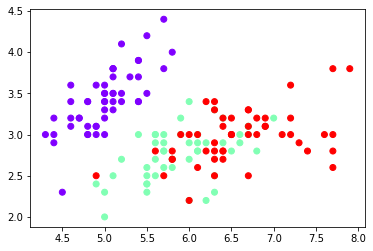

In [33]:
plt.scatter(df.x, df.y, c= df.label, cmap='rainbow')

In [34]:
from sklearn.model_selection import train_test_split

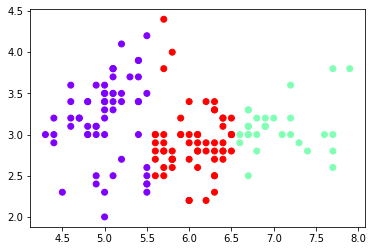

In [120]:
model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
new_labels = model.fit_predict(X[:,:1])
new_labels
plt.scatter(df.x, df.y, c= new_labels,cmap ='rainbow')

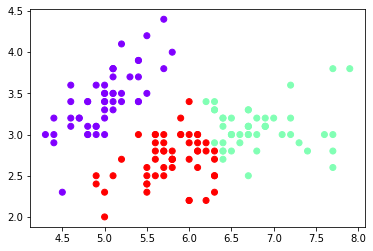

In [121]:
model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
new_labels = model.fit_predict(X[:,:2])
new_labels
plt.scatter(df.x, df.y, c= new_labels, cmap='rainbow')

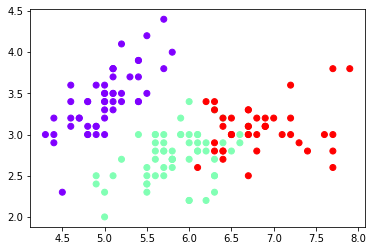

In [122]:
model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
new_labels = model.fit_predict(X[:,:3])
new_labels
plt.scatter(df.x, df.y, c= new_labels, cmap='rainbow')

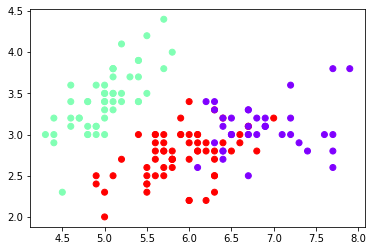

In [89]:
model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
new_labels = model.fit_predict(X[:,:4])
new_labels
plt.scatter(df.x, df.y, c= new_labels, cmap='rainbow')

## K-Means Clustering: Image Segmentation

- Image segmentation is the process of partitioning a digital image into multiple distinct regions containing each pixel with similar attributes i.e. classification of an image into different groups. One of the most popular methods is the k-means clustering algorithm. It is used to segment the interest area from the background.


In [123]:
import cv2

In [2]:
from matplotlib.pyplot import imread

In [93]:
img = imread('DSC_0156.JPG')

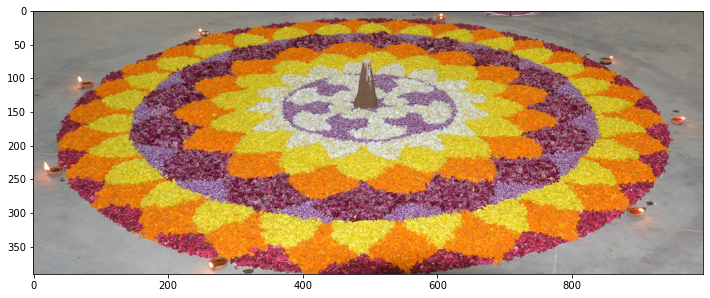

In [94]:
plt.figure(figsize=(12,6))
plt.imshow(img);

In [95]:
img.shape

(391, 995, 3)

In [96]:
reshaped_img = img.reshape(img.shape[0]*img.shape[1],img.shape[2])
reshaped_img.shape

(389045, 3)

- Finding the optimium K-Value using WCSS and Elbow Method

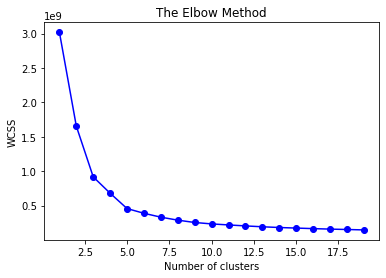

In [98]:
wcss = []

for i in range(1,20):
    model = KMeans(n_jobs=-1, n_clusters = i, random_state=10)
    model.fit(reshaped_img)
    wcss.append(model.inertia_) # Sum of squared distances of samples to their closest cluster center.

plt.plot(range(1,20), wcss, marker='o',color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

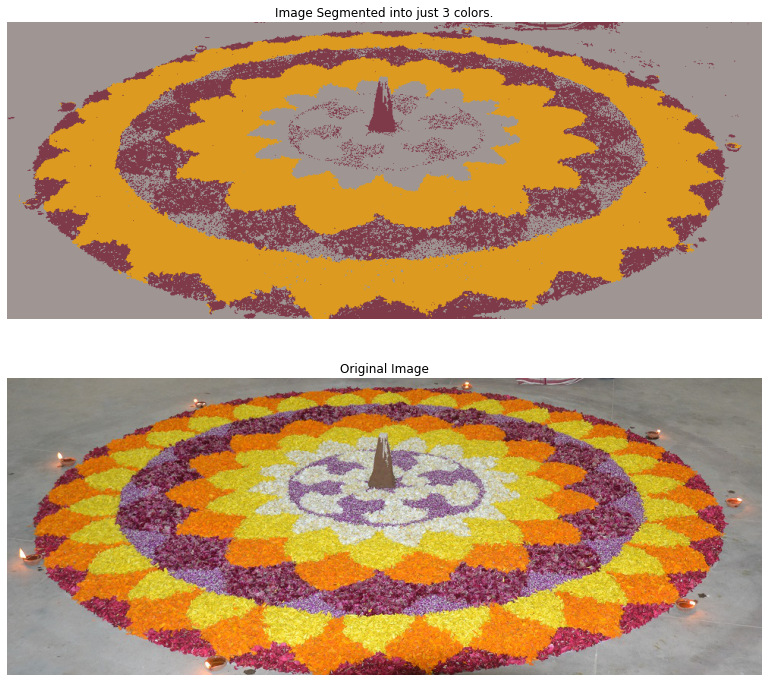

In [78]:
k = 3
model = KMeans(n_jobs=-1, n_clusters = k)
model.fit(reshaped_img)

new_img = model.cluster_centers_[model.labels_]
new_img = new_img.astype('uint8')
new_img = new_img.reshape(img.shape[0],img.shape[1], img.shape[2])

fig, ax = plt.subplots(2,1, figsize=(24,12))
ax[1].imshow(img)
ax[1].axis('off')
ax[1].set_title('Original Image')
ax[0].set_title(f'Image Segmented into just {k} colors.')
ax[0].imshow(new_img)
ax[0].axis('off');

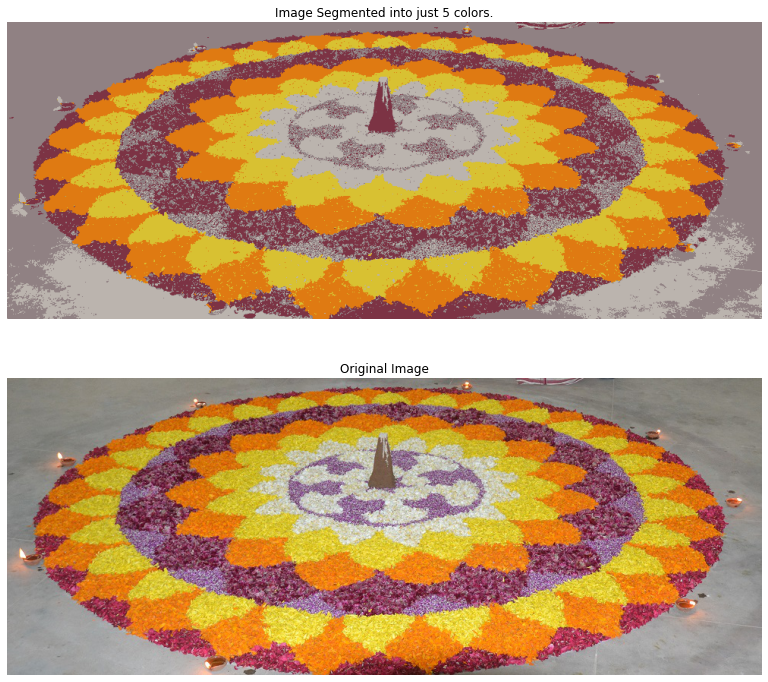

In [80]:
k = 5
model = KMeans(n_jobs=-1, n_clusters = k)
model.fit(reshaped_img)

new_img = model.cluster_centers_[model.labels_]
new_img = new_img.astype('uint8')
new_img = new_img.reshape(img.shape[0],img.shape[1], img.shape[2])

fig, ax = plt.subplots(2,1, figsize=(24,12))
ax[1].imshow(img)
ax[1].axis('off')
ax[1].set_title('Original Image')
ax[0].set_title(f'Image Segmented into just {k} colors.')
ax[0].imshow(new_img)
ax[0].axis('off');

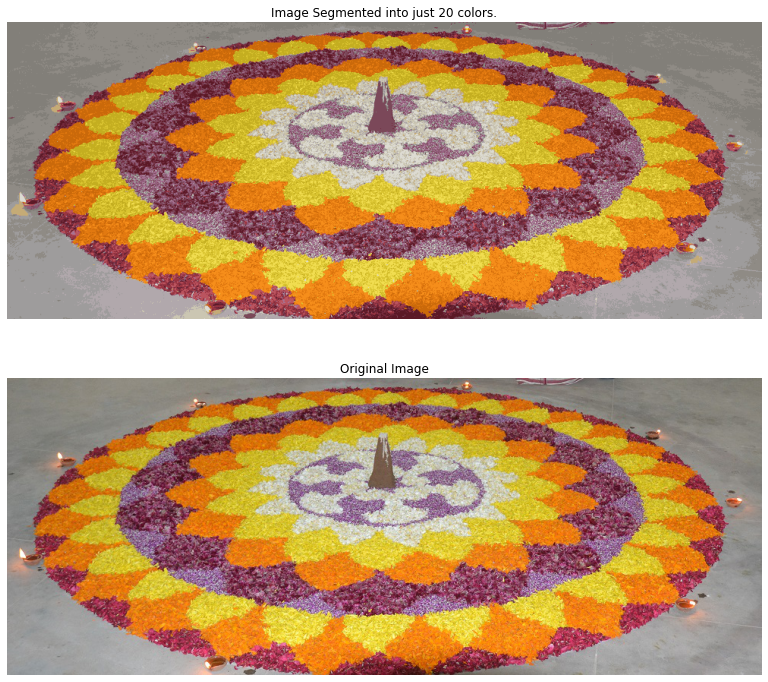

In [81]:
k = 20
model = KMeans(n_jobs=-1, n_clusters = k)
model.fit(reshaped_img)

new_img = model.cluster_centers_[model.labels_]
new_img = new_img.astype('uint8')
new_img = new_img.reshape(img.shape[0],img.shape[1], img.shape[2])

fig, ax = plt.subplots(2,1, figsize=(24,12))
ax[1].imshow(img)
ax[1].axis('off')
ax[1].set_title('Original Image')
ax[0].set_title(f'Image Segmented into just {k} colors.')
ax[0].imshow(new_img)
ax[0].axis('off');

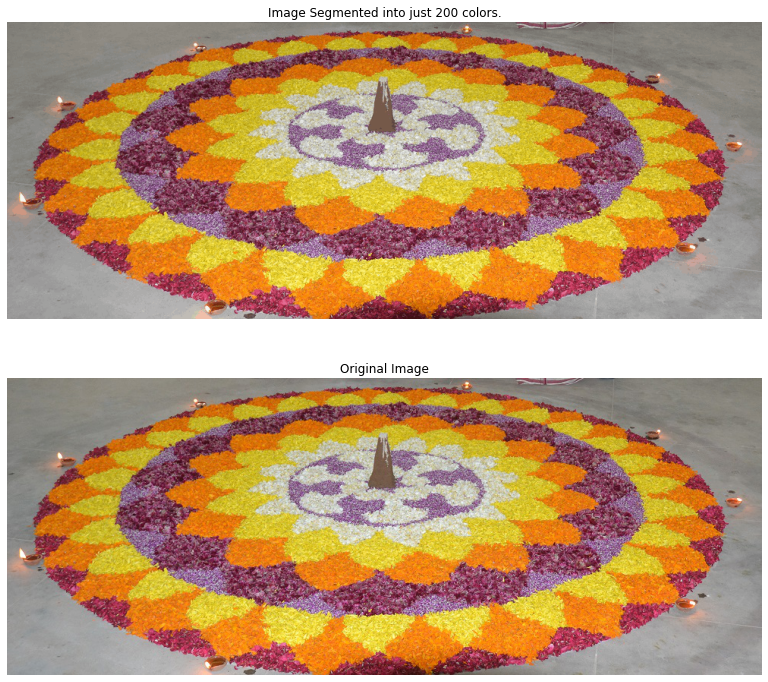

In [91]:
k = 200
model = KMeans(n_jobs=-1, n_clusters = k)
model.fit(reshaped_img)

new_img = model.cluster_centers_[model.labels_]
new_img = new_img.astype('uint8')
new_img = new_img.reshape(img.shape[0],img.shape[1], img.shape[2])

fig, ax = plt.subplots(2,1, figsize=(24,12))
ax[1].imshow(img)
ax[1].axis('off')
ax[1].set_title('Original Image')
ax[0].set_title(f'Image Segmented into just {k} colors.')
ax[0].imshow(new_img)
ax[0].axis('off');